largeqsvを再現させます
arxiv: 2108.01039

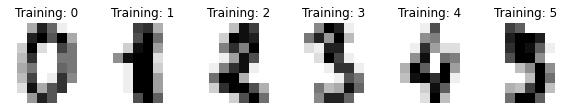

In [2]:
# Author: Gael Varoquaux <gael dot varoquaux at normalesup dot org>
# License: BSD 3 clause

# Standard scientific Python imports
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=6, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

In [9]:
from skqulacs.qsvm import QSVC
from skqulacs.circuit import create_largeqsv_YZCX


n_qubit=8
circuit = create_largeqsv_YZCX(n_qubit,16,0.025)

# flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Create a classifier: a support vector classifier
clf = QSVC(circuit)

# Split data into 72% train and 28% test subsets
#len=1797  1797*72%=1293 大体同じ
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.72, shuffle=False
)

# Learn the digits on the train subset
clf.fit(X_train, y_train)

# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)

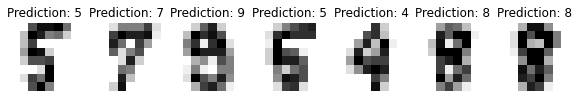

In [10]:
_, axes = plt.subplots(nrows=1, ncols=7, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")

Confusion matrix:
[[121   0   0   0   1   2   0   0   0   3]
 [  0  96  12   1   3   3   5   3   6   1]
 [  0   0 120   1   0   0   0   0   3   1]
 [  0   1   3 109   0   6   0   2   4   5]
 [  1   2   0   0 121   0   0   2   2   4]
 [  0   0   0   0   2 114   2   0   0  14]
 [  1   1   0   0   0   0 127   0   0   1]
 [  0   0   0   0   0   2   0 126   0   1]
 [  0   8   4   2   0   2   1   2 103   5]
 [  0   3   0   1   1   2   0   1   3 121]]


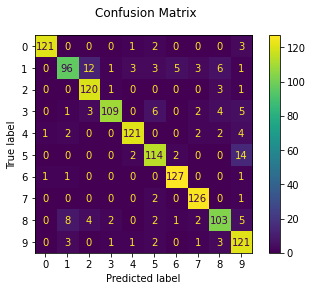

In [11]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()